

---


#    **From Smooth to Complex: Fractalizing SVM Kernels for Better Learning**




---



**1.Problem Statement and Objective:**

>
  The goal is to predict the quality of wine (good or bad) using the physicochemical properties of wine.
* Perform Exploratory Data Analysis (EDA) to understand patterns and correlations.

*  We will SVM with RBF kernel to handle the nonlinear relationships in the data.


* Use Hyperparameter Tuning to optimize model performance.

* Then will implement the Fractal Gaussian RBF Kernel with Hermite spline perturbation For Better Learning .

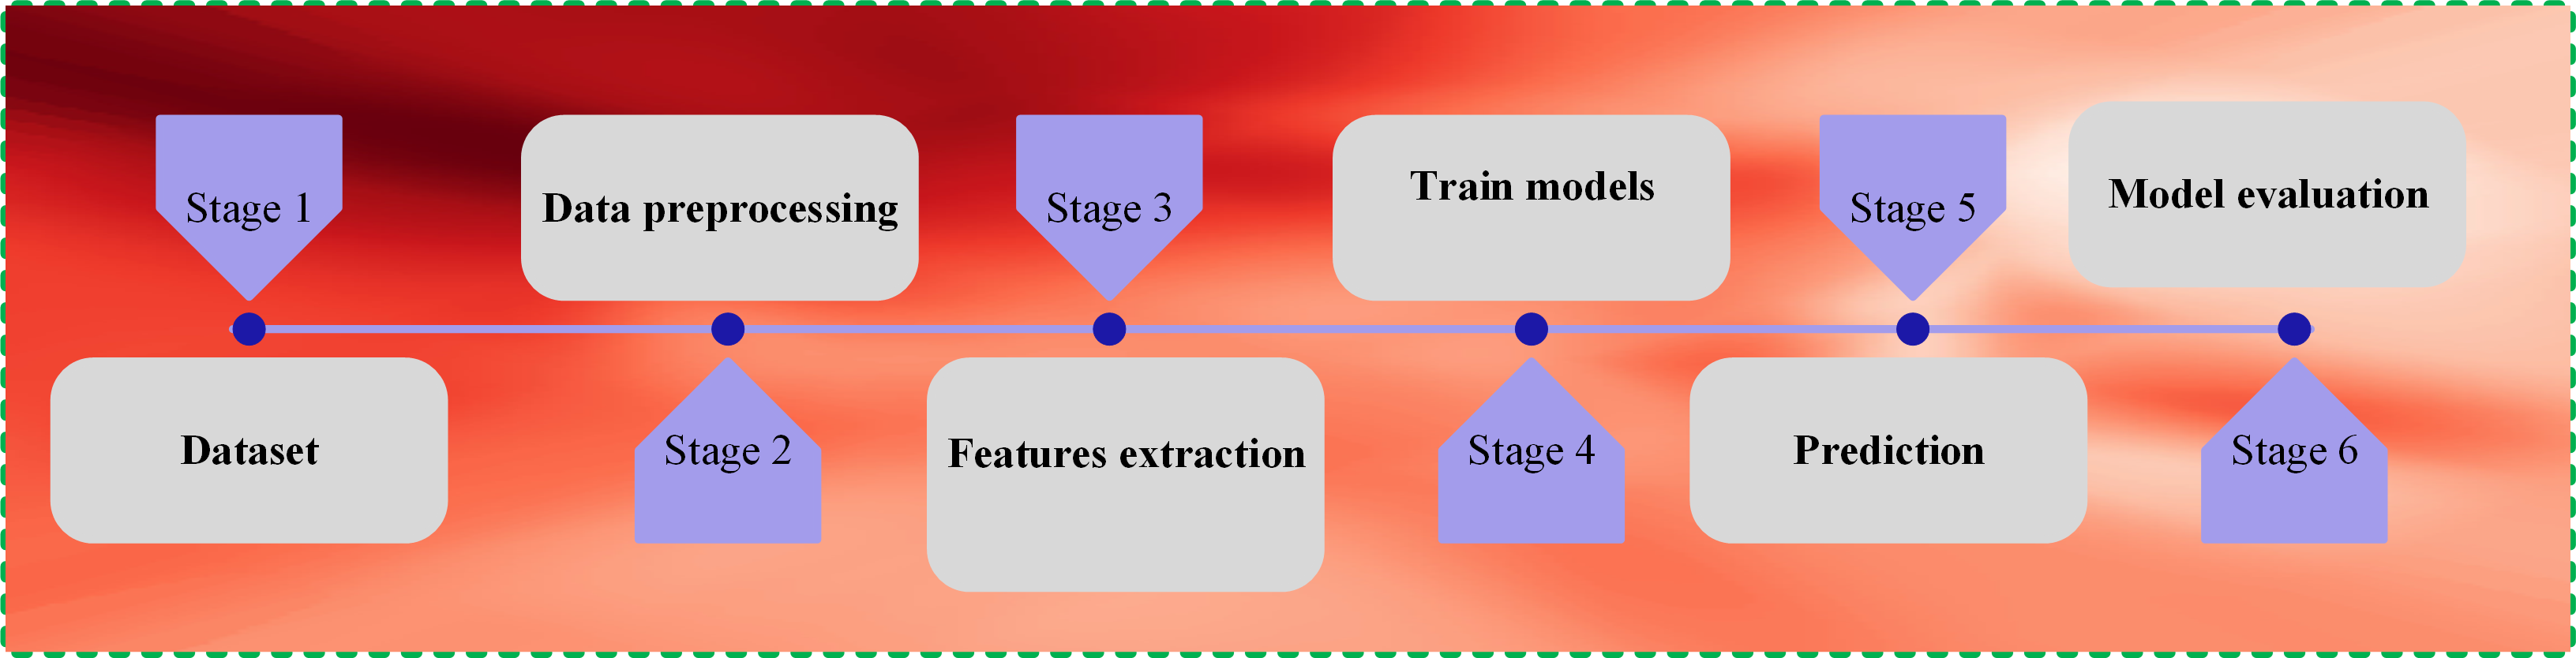

**Importing Necessary Libraries**

In [ ]:
!pip install imblearn

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

**Loading the data sets**

In [ ]:
 # Load the dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv('/content/winequality-red.csv')

# Display basic information
print("Shape of the dataset:", wine.shape)
print("Original Data Preview:")
display(wine.head())


Shape of the dataset: (1599, 12)
Original Data Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


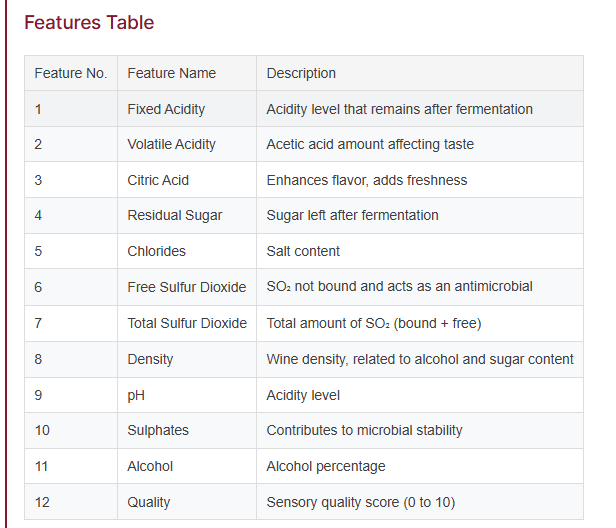

In [ ]:
print("\nData Info:\n")
print(wine.info())



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
print("\nMissing Values:\n", wine.isnull().sum())


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Descriptive statistics for numerical columns
print("\nOriginal Data Describe:")
display(wine.describe().T.style.background_gradient(cmap='YlOrRd'))


Original Data Describe:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


📊 Descriptive Statistics Analysis:
The descriptive statistics give us valuable insights into the dataset:

**Central Tendency and Spread:**

Most features have a mean close to their median (50% quantile), indicating a roughly symmetric distribution.

Fixed Acidity: Ranges from **4.6 to 15.9**, with a mean of **8.32**.

Volatile Acidity: Ranges from **0.12 to 1.58**, with a mean of **0.53**.

Citric Acid: Ranges from **0.00 to 1.00**, with a mean of **0.27**.

Residual Sugar: Ranges from 0.9 to 15.5, with a mean of **2.54**.

Sulfur Dioxide Levels:

Free Sulfur Dioxide: Has a wide range from 1 to 72, with an average of 15.87.

Total Sulfur Dioxide: Varies significantly from 6 to 289, with a mean of 46.47.

Density and pH:

Density: Varies slightly around 0.9967.

pH: Mostly lies between 3.21 and 3.40 with an average of 3.31.

Sulphates and Alcohol Content:

Sulphates: Range from 0.33 to 2.00, with a mean of 0.66.

Alcohol: Varies from 8.4% to 14.9%, with an average of 10.42%.

Quality (Target Variable):

Quality ratings vary from **3 to 8** with a mean of **5.64**.

**Insights:**

There might be outliers in the volatile acidity, residual sugar, total sulfur dioxide, and sulphates columns due to high standard deviations and large ranges.

The alcohol content might significantly influence quality, as higher alcohol percentages might indicate better wine quality.

The pH and density are less variable, indicating consistency across samples.



<ipython-input-10-80b8a4976e13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette='viridis')


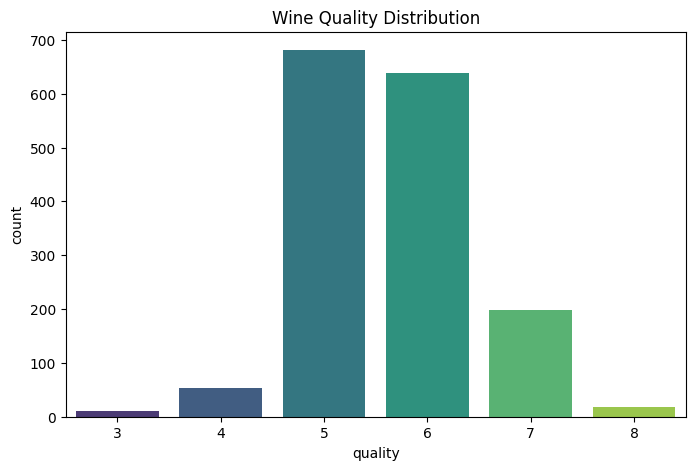

In [ ]:
# Distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title("Wine Quality Distribution")
plt.show()


In [ ]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

**Insights:**
# Imbalance in Target: The data shows that most wines are rated between 5 and 6.

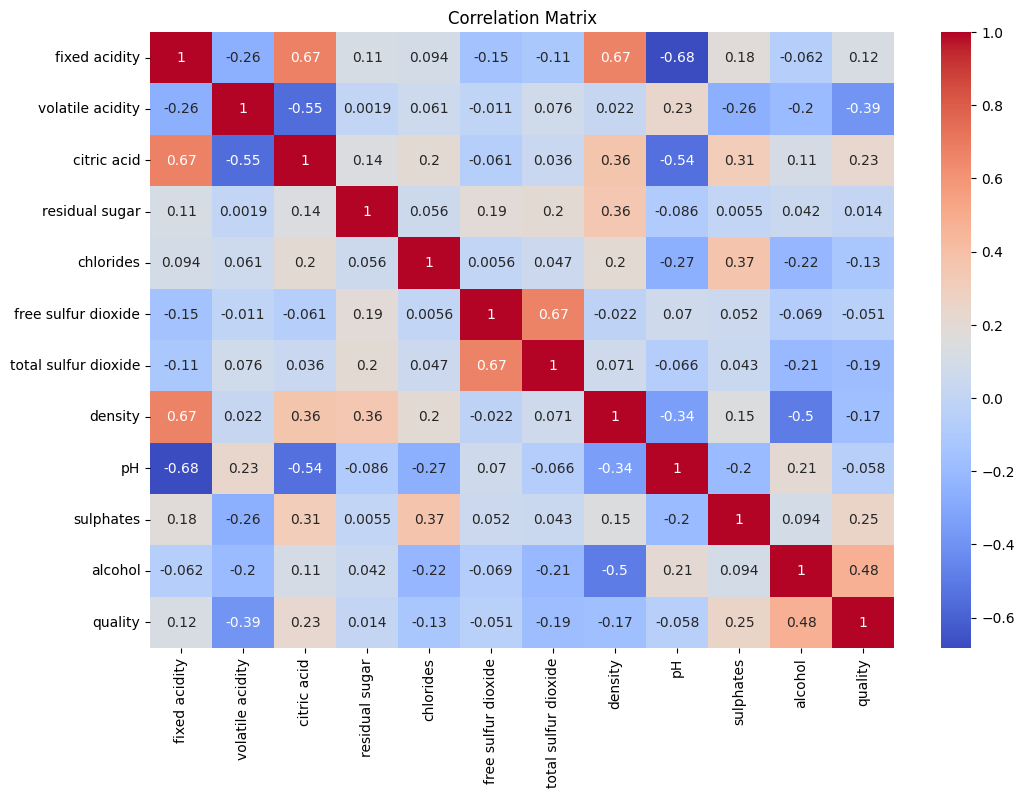

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#Bivariate Analysis

<ipython-input-13-4b7add8b464f>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


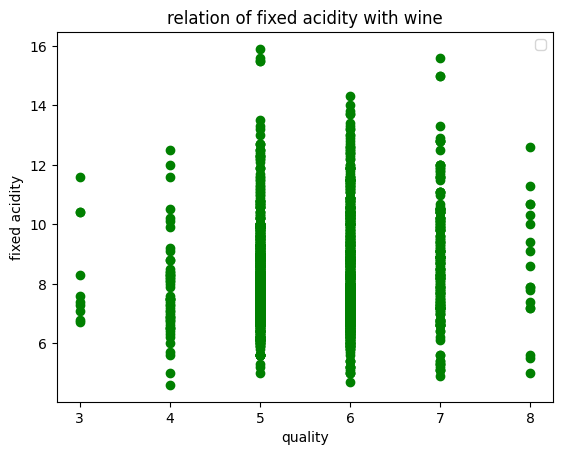

In [ ]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(wine['quality'], wine['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()


# **EDA Insights:**   Correlated Features: Alcohol, sulphates, and citric acid show a higher correlation with wine quality.


<ipython-input-14-8ea7af50ae2d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['fixed acidity'])


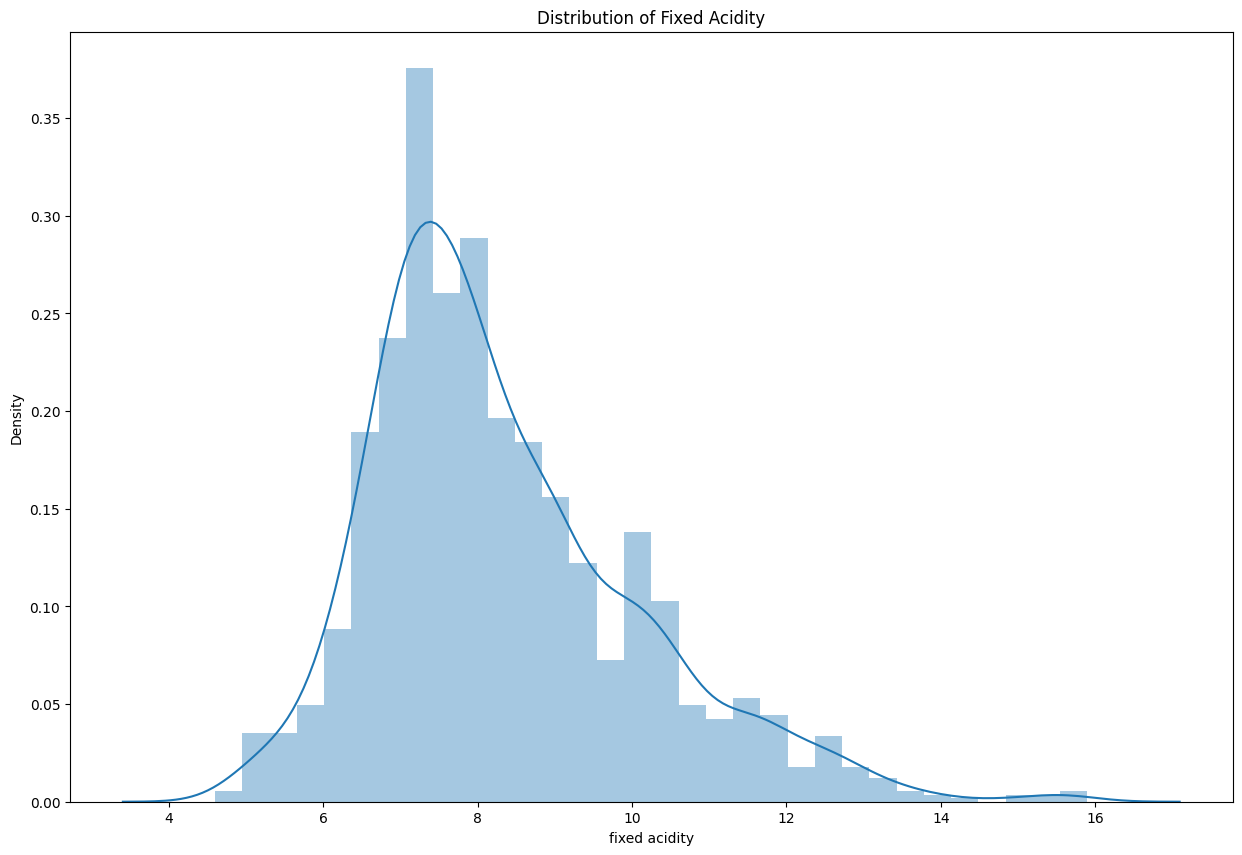

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(wine['fixed acidity'])
plt.title('Distribution of Fixed Acidity')
plt.show()

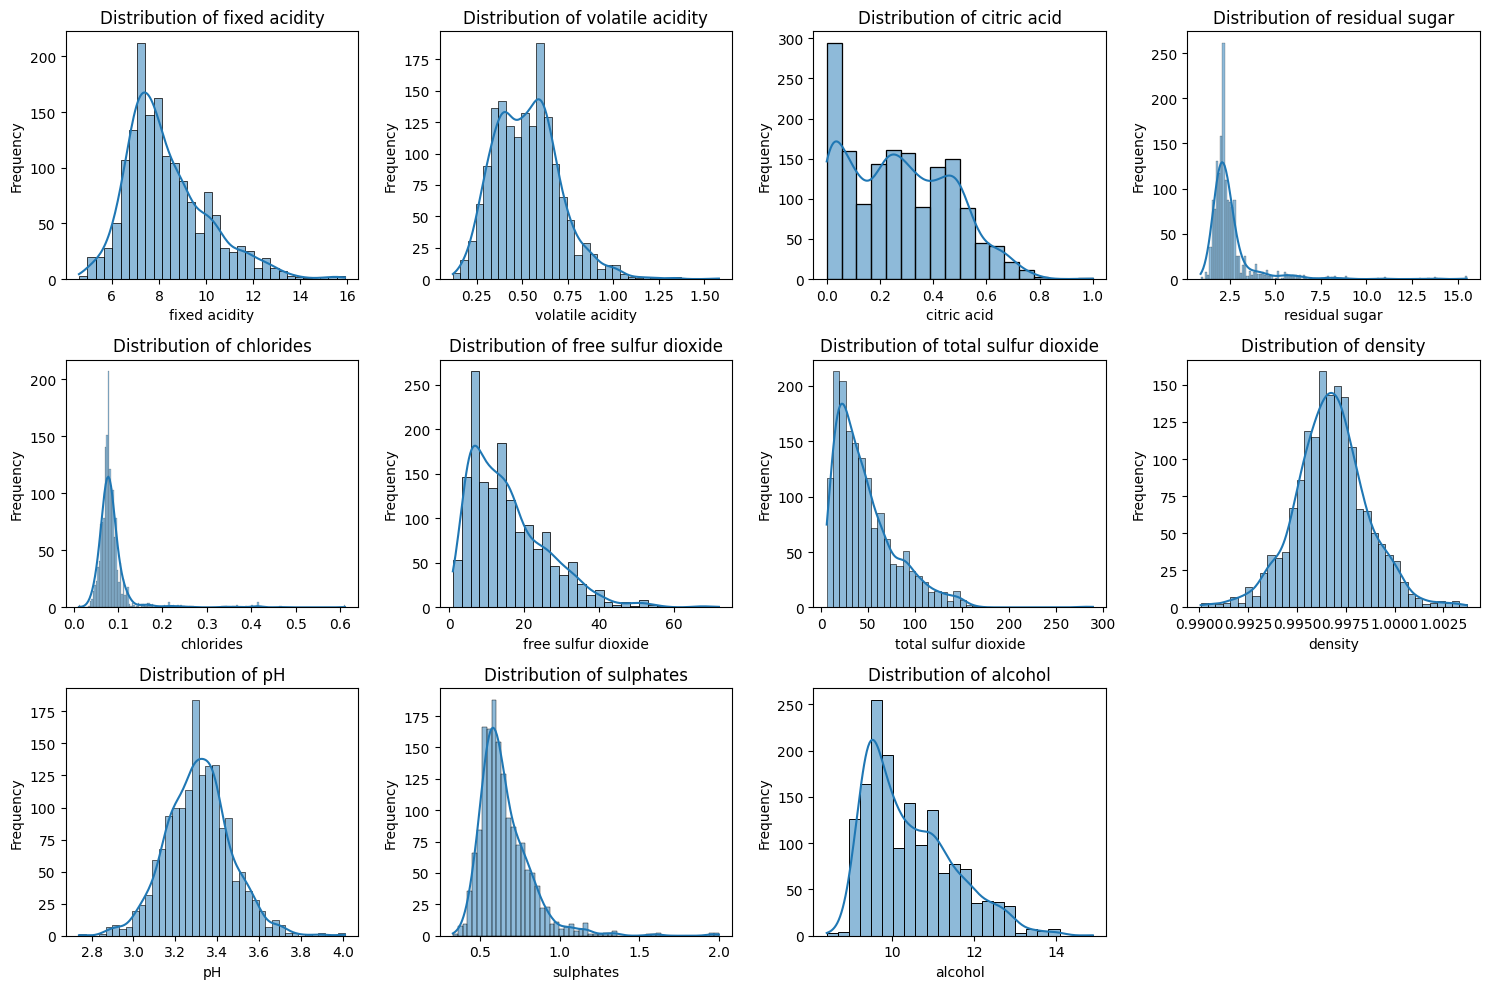

In [ ]:
# Visualize feature distributions using histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(wine.columns[:-1]):  # Exclude the target variable 'quality'
    plt.subplot(3, 4, i + 1)
    sns.histplot(wine[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

What is Skewness?

Skewness measures the asymmetry of the distribution of values.

**Formula**
### Nonparametric skew = (mean - median) / std


A skewness of 0 means a perfectly symmetric distribution.

Positive skew: Tail on the right (more smaller values).

Negative skew: Tail on the left (more larger values).

In [ ]:
# Calculate the skewness for all numerical columns
skewness = wine.skew()
skewness

,0
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


### Box Plot:
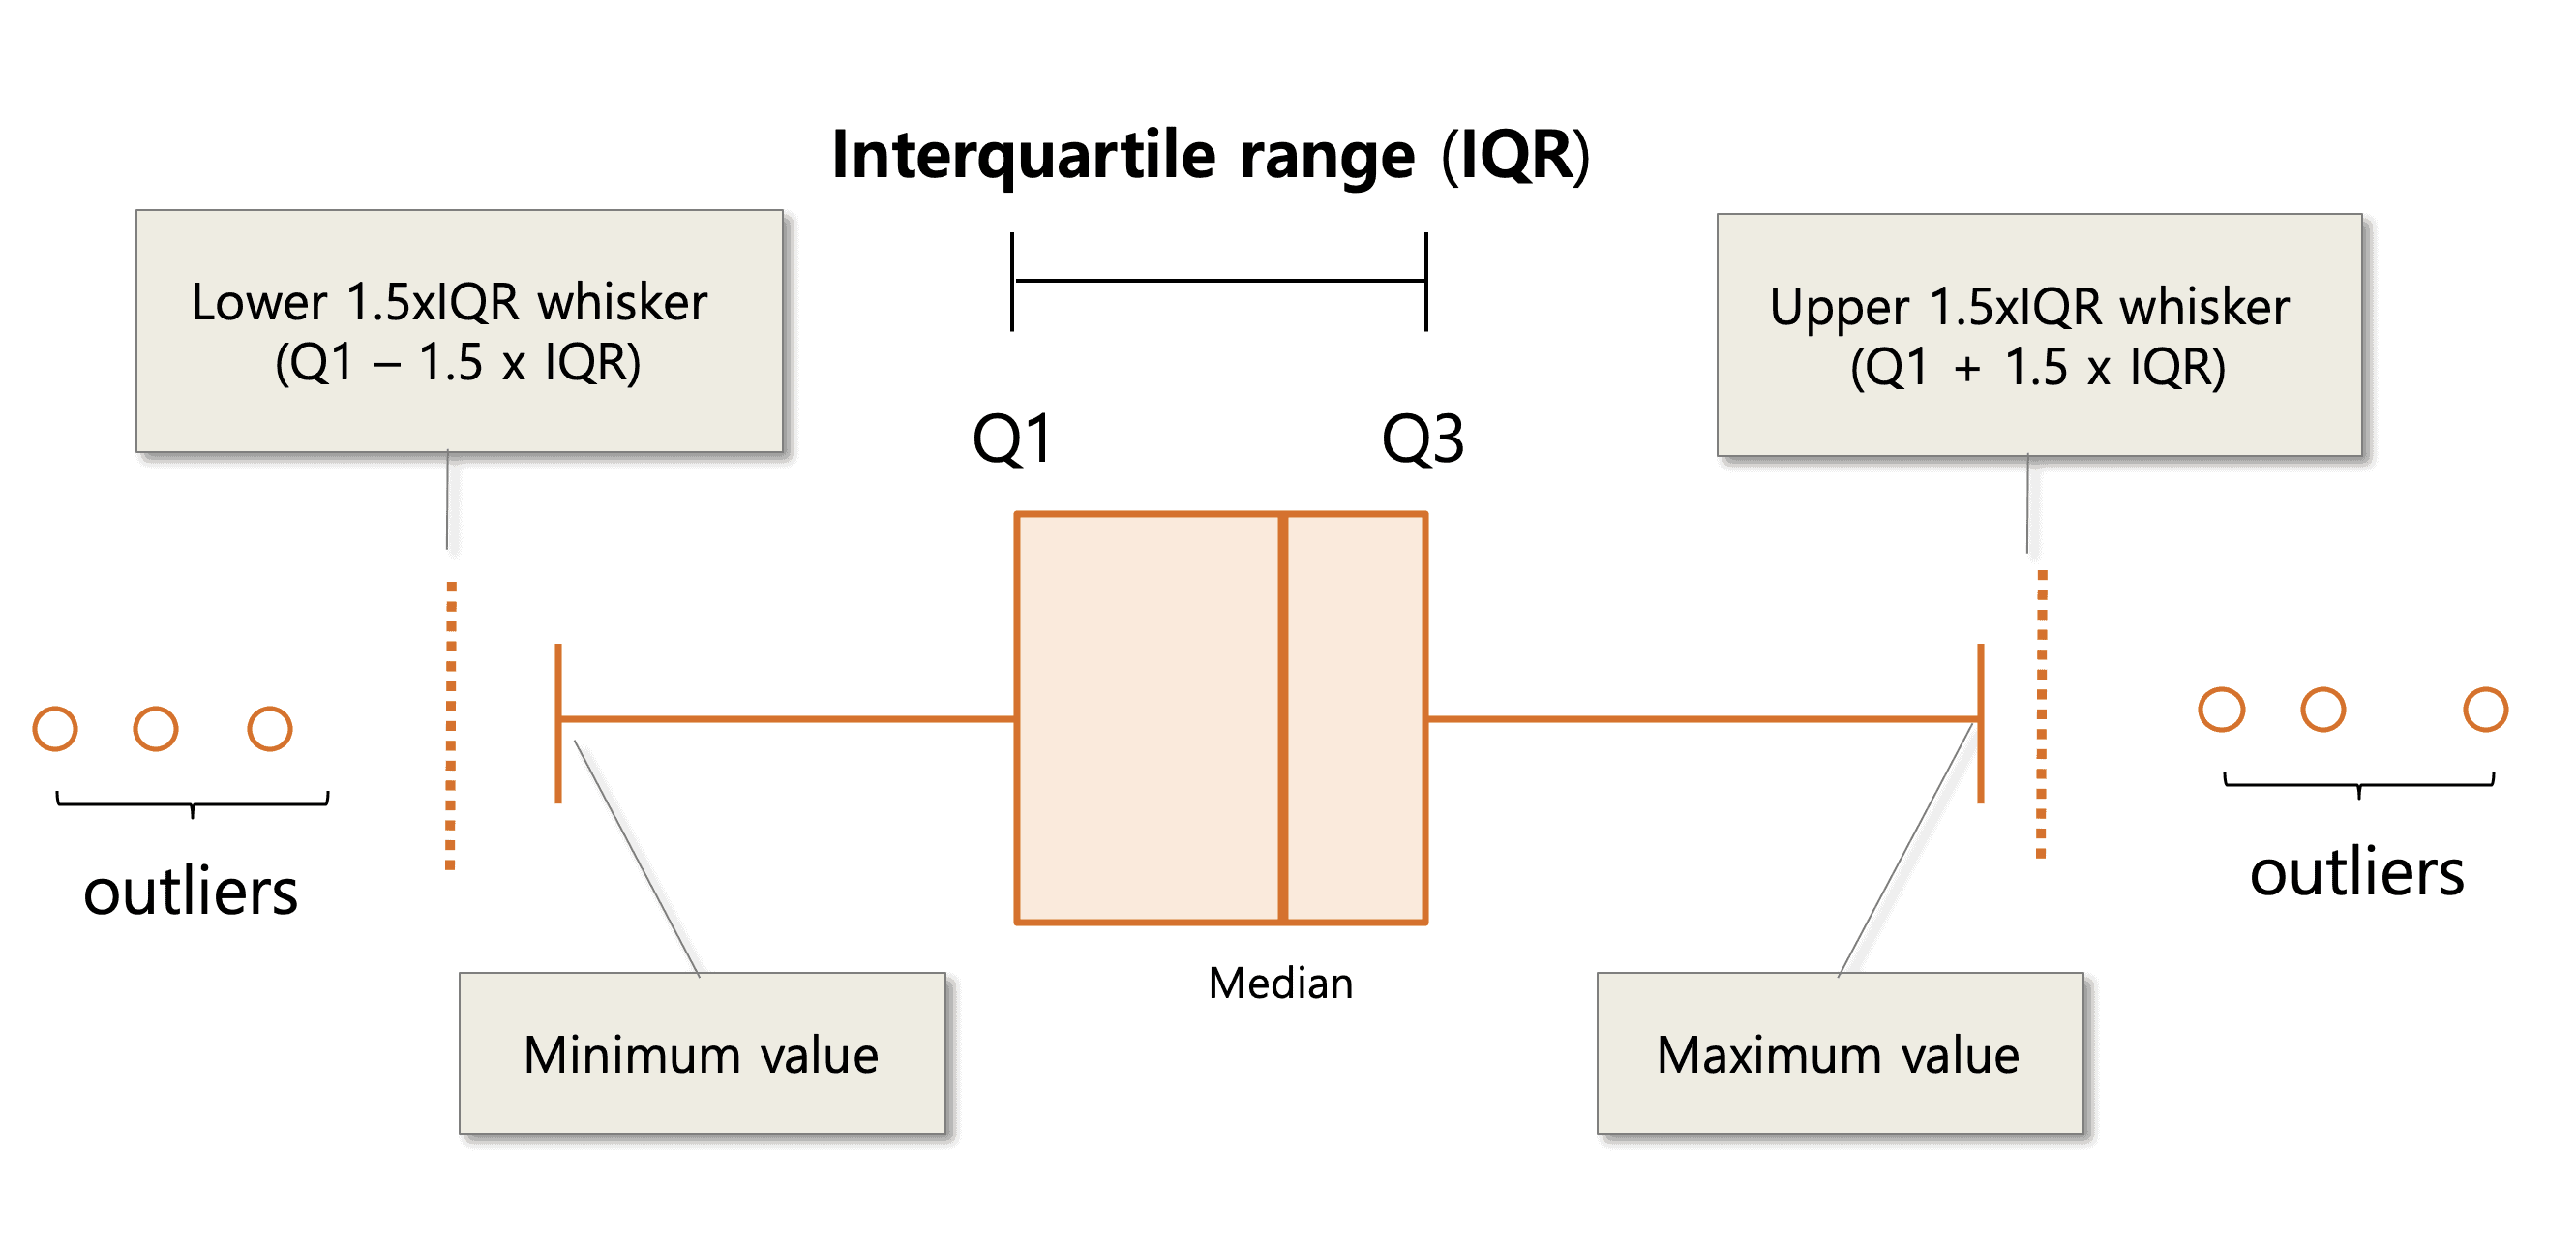



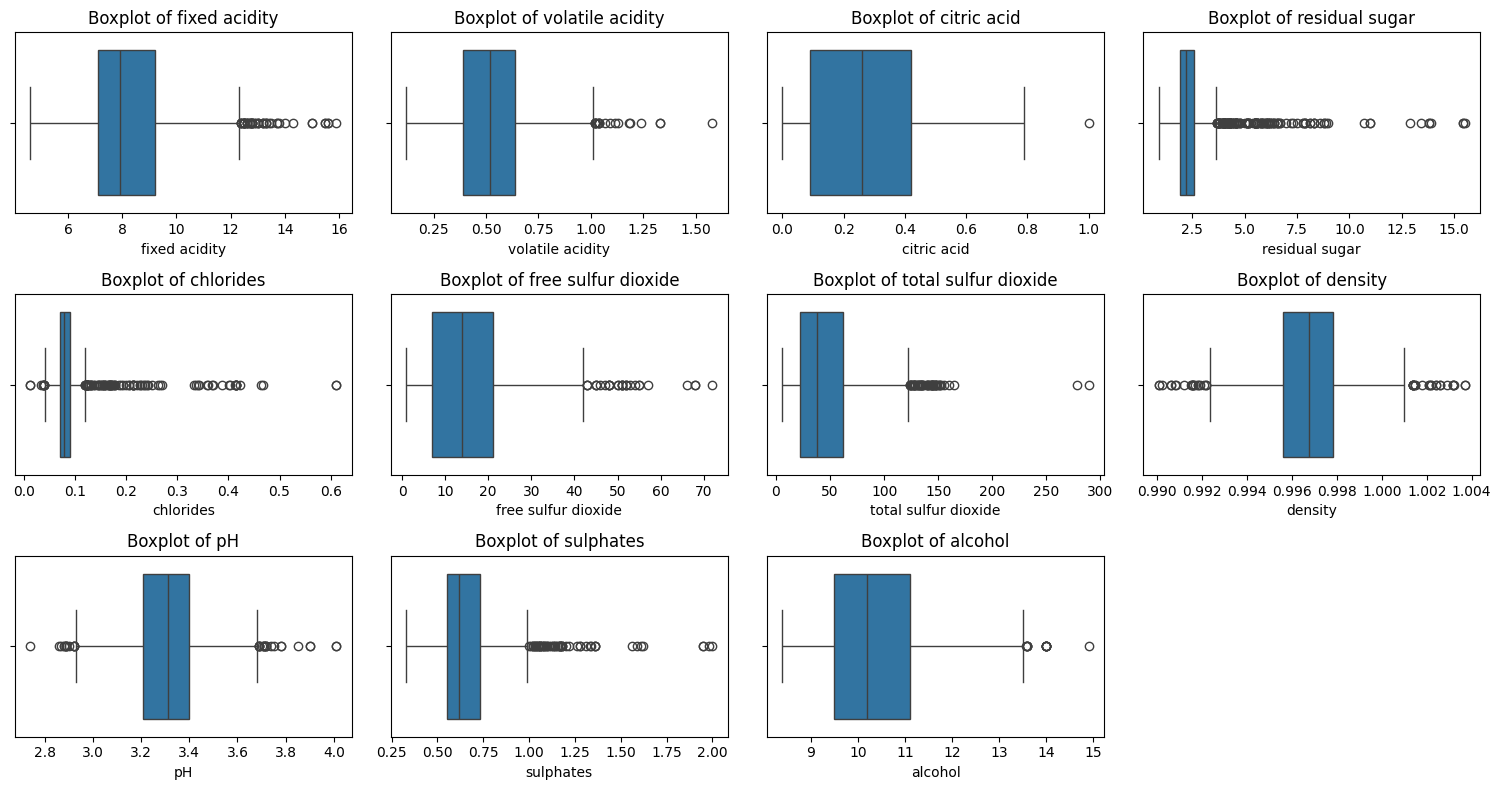

In [ ]:
# Create boxplots for each feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(wine.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=wine[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


# Understanding Boxplots:
Box: Represents the interquartile range (IQR), which contains the middle 50% of the data.

Line inside the box: Median (50th percentile).

Whiskers: Extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles.

Dots (Outliers): Data points that fall outside the whiskers, indicating potential anomalies or extreme values.

Plot Analysis:
Fixed Acidity:

Most values lie between 7 and 9.

Outliers are seen above 14, indicating a few samples with unusually high acidity.

Volatile Acidity:

Median around 0.3-0.4.

Outliers are notably present beyond 0.8, suggesting some wines have much higher volatility.

Citric Acid:

Median around 0.3.

A few outliers exist above 1.0, indicating unusually acidic wines.

Residual Sugar:

Most values are below 4, but outliers go up to around 15, indicating some wines with significantly higher sugar content.

Chlorides:

Median is very low (around 0.05), but a few outliers exceed 0.4, suggesting some wines are significantly saltier.

Free Sulfur Dioxide:

Median around 15.

Outliers are seen above 60, indicating higher preservative levels in some samples.

Total Sulfur Dioxide:

Median around 50.

Several outliers extend beyond 200, indicating wines with very high sulfur content.

Density:

Median around 0.996.

Outliers are slightly above and below the typical range, indicating some wines are unusually dense or light.

pH:

Median around 3.3.

Outliers on both lower and higher sides (below 2.8 and above 3.8), indicating abnormal acidity levels in some wines.

Sulphates:

Median around 0.6.

Significant outliers above 1.5, indicating some wines with high sulfate content.

Alcohol:

Median around 10.5.

Outliers above 13, indicating some wines have significantly higher alcohol content.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Binarize quality: 3,4,5 → bad(0); 6,7,8 → good(1)
wine['quality'] = wine['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Define features and target
X = wine.drop("quality", axis=1)
y = wine["quality"]

# Handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

# Output shapes
print("Resampled Training Set:", X_train.shape)
print("Resampled Test Set:", X_test.shape)

# Create a new DataFrame with the resampled data
wine_resampled = pd.DataFrame(X_resampled, columns=X.columns)
wine_resampled['quality'] = y_resampled
wine_resampled.head()


Resampled Training Set: (1368, 11)
Resampled Test Set: (342, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Grouped Barplot for Quality

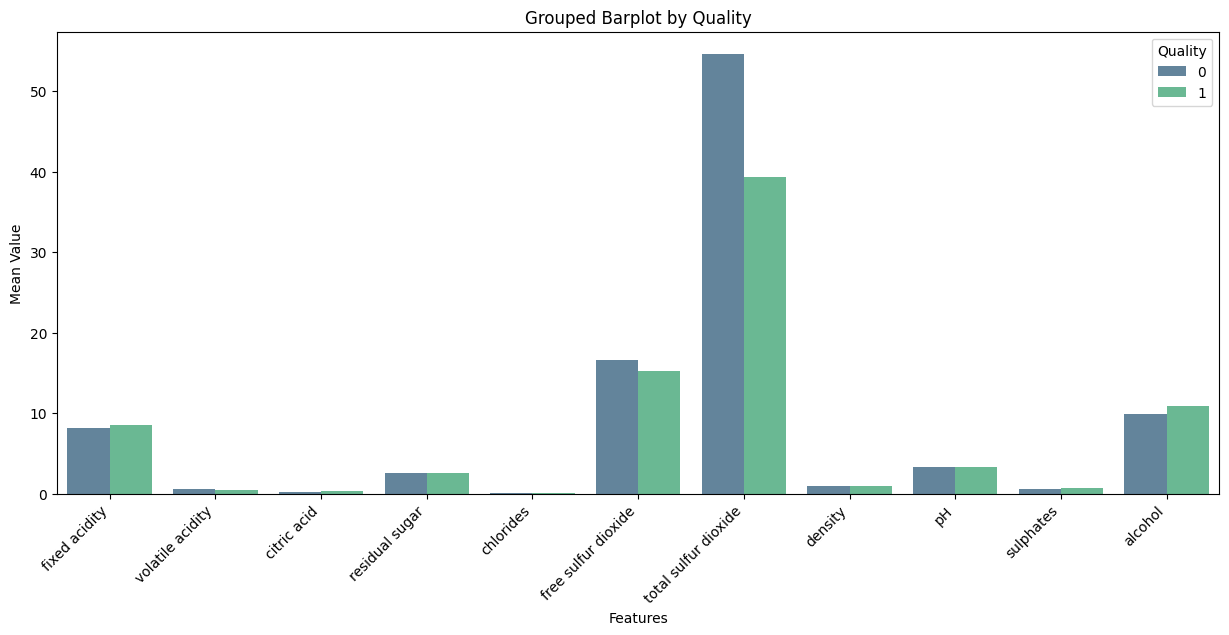

In [ ]:
plt.figure(figsize=(15, 6))

mean_values = wine.groupby('quality').mean().reset_index()

# Melt the DataFrame to prepare it for the barplot
melted_data = pd.melt(mean_values, id_vars=['quality'], var_name='Features', value_name='Mean Value')

sns.barplot(data=melted_data,
            x='Features', y='Mean Value', hue='quality', palette='viridis', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Grouped Barplot by Quality')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality')

plt.show()

In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.1,0.2,0.5, 1,5,1.4,10,15], 'gamma': [0.01, 0.1, 1,0.5]}
grid_search = GridSearchCV(svm_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")

# Update svm_model with the best estimator
svm_model = grid_search.best_estimator_

Best C: 1
Best gamma: 0.5


In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

# Metrics
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f" Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76       156
           1       0.80      0.78      0.79       186

    accuracy                           0.77       342
   macro avg       0.77      0.77      0.77       342
weighted avg       0.78      0.77      0.78       342

 Confusion Matrix:
 [[119  37]
 [ 40 146]]
 Accuracy Score: 0.7749


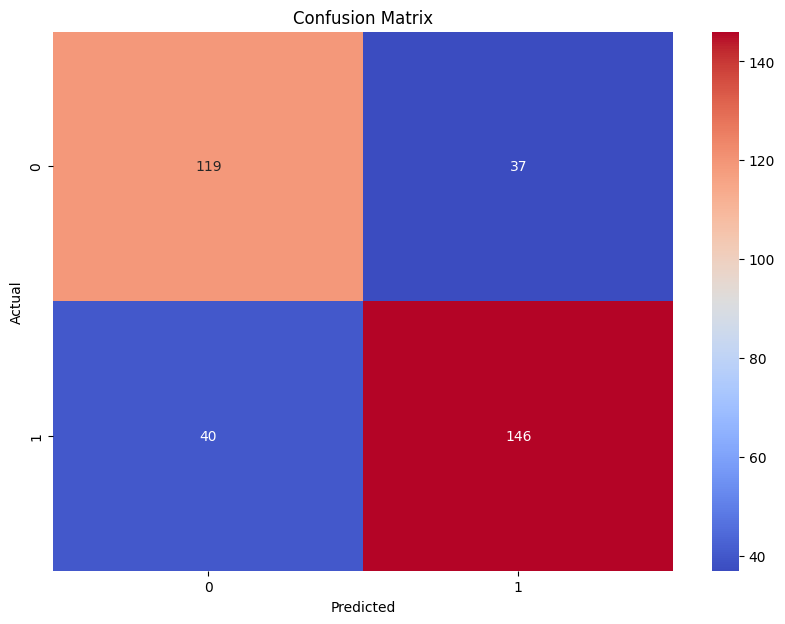

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",xticklabels=wine['quality'].unique(),
            yticklabels=wine['quality'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#FRACTAL GAUSSION RBF  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.interpolate import interp1d, CubicHermiteSpline
from scipy.stats import uniform

# ========== Fractal Kernel Components ==========

class AlphaFractal:
    def __init__(self, scale_vector, b_func, f_func, interval, num_intervals, max_depth):
        self.scale_vector = scale_vector
        self.b_func = b_func
        self.f_func = f_func
        self.I = interval
        self.N = num_intervals
        self.max_depth = max_depth
        self.h = (self.I[1] - self.I[0]) / self.N
        self.transformations = []
        self.create_transformations()

    def create_transformations(self):
        for i in range(self.N):
            alpha = self.scale_vector[i]

            def L_i(x, i=i):
                return (x - self.I[0]) / self.N + self.I[0] + i * self.h

            def w(x, y, alpha=alpha, L_i=L_i):
                x_new = L_i(x)
                y_new = alpha * (y - self.b_func(x)) + self.f_func(x_new)
                return x_new, y_new

            self.transformations.append(w)

    def generate_points(self, x0, y0):
        current_points = [(x0, y0)]
        points_x, points_y = [x0], [y0]

        for _ in range(self.max_depth):
            new_points = []
            for (x, y) in current_points:
                for transform in self.transformations:
                    new_x, new_y = transform(x, y)
                    points_x.append(new_x)
                    points_y.append(new_y)
                    new_points.append((new_x, new_y))
            current_points = new_points

        return points_x, points_y

# To get a piecewise linear interpolating function from the fractal points.
    def falpha(self):
        x_vals, y_vals = self.generate_points(0.5, 0.5)
        sorted_indices = np.argsort(x_vals)
        x_sorted = np.array(x_vals)[sorted_indices]
        y_sorted = np.array(y_vals)[sorted_indices]
        unique_indices = np.unique(x_sorted, return_index=True)[1]
        x_unique = x_sorted[unique_indices]
        y_unique = y_sorted[unique_indices]
        f = interp1d(x_unique, y_unique, kind='linear', fill_value="extrapolate")
        return f

def build_fractal_rbf(gamma, K, alpha_array, N_intervals=5, max_depth=8):
    d_values = np.linspace(0, K, N_intervals + 1)
    y_values = np.exp(-gamma * d_values)

    def rbf_prime(x):
        return -gamma * np.exp(-gamma * x)

    dy_nodes = rbf_prime(d_values)

    f_hermite = CubicHermiteSpline(d_values, y_values, dy_nodes)

    alpha_fractal = AlphaFractal(
        scale_vector=alpha_array,
        b_func=f_hermite,
        f_func=lambda x: np.exp(-gamma * x),
        interval=[0, K],
        num_intervals=N_intervals,
        max_depth=max_depth
    )
    return alpha_fractal.falpha()

def fractal_rbf_kernel(X1, X2, gamma=0.5, alpha_array=None, N_intervals=5, max_depth=8):
    all_distances = [np.linalg.norm(x1 - x2) for x1 in X1 for x2 in X2]
    K_val = max(all_distances)
    fractal_func = build_fractal_rbf(gamma, K_val, alpha_array, N_intervals, max_depth)

    K_matrix = np.zeros((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            dist = np.linalg.norm(X1[i] - X2[j]) ** 2
            K_matrix[i, j] = fractal_func(dist)
    return K_matrix

# ========== Custom Wrapper for SVM + Fractal Kernel ==========

class FractalSVMWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, gamma=0.5, alpha_array=None, N_intervals=5, max_depth=8, C=1.0):
        self.gamma = gamma
        self.alpha_array = alpha_array
        self.N_intervals = N_intervals
        self.max_depth = max_depth
        self.C = C
        self.clf = None

    def fit(self, X, y):
        self.X_train_ = X
        self.y_train_ = y
        self.fractal_K_train_ = fractal_rbf_kernel(
            X, X,
            gamma=self.gamma,
            alpha_array=self.alpha_array,
            N_intervals=self.N_intervals,
            max_depth=self.max_depth
        )
        self.clf = SVC(kernel='precomputed', C=self.C)
        self.clf.fit(self.fractal_K_train_, y)
        return self

    def predict(self, X):
        K_test = fractal_rbf_kernel(
            X, self.X_train_,
            gamma=self.gamma,
            alpha_array=self.alpha_array,
            N_intervals=self.N_intervals,
            max_depth=self.max_depth
        )
        return self.clf.predict(K_test)


# ========== Parameter Distribution ==========

N_intervals = 5
C=1
# param_dist = {
#     'alpha_array': [uniform(loc=0.0, scale=1.0).rvs(size=N_intervals) for _ in range(100)]
# }

param_dist = {
    'alpha_array': [uniform(loc=-1.0, scale=1.0).rvs(size=N_intervals) for _ in range(100)]
}
# ========== Randomized Search ==========

model = FractalSVMWrapper(gamma=0.5, N_intervals=N_intervals, max_depth=8)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train)

# ========== Evaluation ==========

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best parameters:", search.best_params_)
print("Best CV accuracy:", search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_array=[0.75399633 0.63521373 0.4271546  0.16531012 0.05533425]; total time=  42.4s
[CV] END alpha_array=[0.75399633 0.63521373 0.4271546  0.16531012 0.05533425]; total time=  42.6s
[CV] END alpha_array=[0.75399633 0.63521373 0.4271546  0.16531012 0.05533425]; total time=  42.5s
[CV] END alpha_array=[0.75399633 0.63521373 0.4271546  0.16531012 0.05533425]; total time=  42.8s
[CV] END alpha_array=[0.75399633 0.63521373 0.4271546  0.16531012 0.05533425]; total time=  42.2s
[CV] END alpha_array=[0.13101189 0.77339943 0.40140357 0.51470264 0.56812514]; total time=  42.2s
[CV] END alpha_array=[0.13101189 0.77339943 0.40140357 0.51470264 0.56812514]; total time=  42.2s
[CV] END alpha_array=[0.13101189 0.77339943 0.40140357 0.51470264 0.56812514]; total time=  42.2s
[CV] END alpha_array=[0.13101189 0.77339943 0.40140357 0.51470264 0.56812514]; total time=  42.4s
[CV] END alpha_array=[0.13101189 0.77339943 0.40140357 0.

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d
# from scipy.interpolate import CubicHermiteSpline
# import random
# from scipy.stats import uniform


# # ========= Fractal Class =========
# class AlphaFractal:
#     def __init__(self, scale_vector, b_func, f_func, interval, num_intervals, max_depth):
#         self.scale_vector = scale_vector
#         self.b_func = b_func
#         self.f_func = f_func
#         self.I = interval
#         self.N = num_intervals
#         self.max_depth = max_depth
#         self.h = (self.I[1] - self.I[0]) / self.N
#         self.transformations = []
#         self.create_transformations()

#     def create_transformations(self):
#         for i in range(self.N):
#             alpha = self.scale_vector[i]

#             def L_i(x, i=i):
#                 return (x - self.I[0]) / self.N + self.I[0] + i * self.h

#             def w(x, y, alpha=alpha, L_i=L_i):
#                 x_new = L_i(x)
#                 y_new = alpha * (y - self.b_func(x)) + self.f_func(x_new)
#                 return x_new, y_new

#             self.transformations.append(w)

#     def generate_points(self, x0, y0):
#         current_points = [(x0, y0)]
#         points_x, points_y = [x0], [y0]

#         for depth in range(self.max_depth):
#             new_points = []
#             for (x, y) in current_points:
#                 for transform in self.transformations:
#                     new_x, new_y = transform(x, y)
#                     points_x.append(new_x)
#                     points_y.append(new_y)
#                     new_points.append((new_x, new_y))
#             current_points = new_points

#         return points_x, points_y

#     def falpha(self):
#         x_vals, y_vals = self.generate_points(0.5, 0.5)

#         sorted_indices = np.argsort(x_vals)
#         x_sorted = np.array(x_vals)[sorted_indices]
#         y_sorted = np.array(y_vals)[sorted_indices]

#         unique_indices = np.unique(x_sorted, return_index=True)[1]
#         x_unique = x_sorted[unique_indices]
#         y_unique = y_sorted[unique_indices]

#         f = interp1d(x_unique, y_unique, kind='linear', fill_value="extrapolate")
#         return f

# # ==========  Build the Fractalized RBF ==========

# def build_fractal_rbf(gamma, K, alpha_array, N_intervals=5, max_depth=8):
#     d_values = np.linspace(0, K, N_intervals + 1)
#     y_values = np.exp(-gamma * d_values)

#     # Approximate derivative of RBF
#     def rbf_prime(x):
#         return -2 * gamma * x * np.exp(-gamma * x)

#     dy_nodes = rbf_prime(d_values)

#     # Cubic Hermite interpolation for b(x)
#     f_hermite = CubicHermiteSpline(d_values, y_values, dy_nodes)

#     alpha_fractal = AlphaFractal(
#         scale_vector=alpha_array,
#         b_func=f_hermite,
#         f_func=lambda x: np.exp(-gamma * x**2),
#         interval=[0, K],
#         num_intervals=N_intervals,
#         max_depth=max_depth
#     )
#     return alpha_fractal.falpha()

# # ==========  Define Fractalized Kernel ==========

# def fractal_rbf_kernel(X1, X2, gamma=0.5, alpha_array=None, N_intervals=5, max_depth=8):
#     # Calculate maximum distance K
#     all_distances = [np.linalg.norm(x1 - x2) for x1 in X1 for x2 in X2]
#     K = max(all_distances)

#     # Build the fractal approximation
#     fractal_func = build_fractal_rbf(gamma, K, alpha_array, N_intervals=N_intervals, max_depth=max_depth)

#     K_matrix = np.zeros((len(X1), len(X2)))
#     for i in range(len(X1)):
#         for j in range(len(X2)):
#             dist = np.linalg.norm(X1[i] - X2[j]) ** 2
#             K_matrix[i, j] = fractal_func(dist)
#         print(f"Row {i+1}/{len(X1)} done")
#     return K_matrix

# # ==========  Define FractalSVM ==========

# class FractalSVM(SVC):
#     def __init__(self, gamma=0.5, alpha_array=None, **kwargs):
#         super().__init__(kernel='precomputed', **kwargs)
#         self.gamma = gamma
#         self.alpha_array = alpha_array

#     def fit(self, X, y):
#         self.X_train_ = X.values if isinstance(X, pd.DataFrame) else X
#         self.fractal_K_train_ = fractal_rbf_kernel(self.X_train_, self.X_train_, gamma=self.gamma, alpha_array=self.alpha_array)
#         return super().fit(self.fractal_K_train_, y)

#     def predict(self, X):
#         X = X.values if isinstance(X, pd.DataFrame) else X
#         K_test = fractal_rbf_kernel(X, self.X_train_, gamma=self.gamma, alpha_array=self.alpha_array)
#         return super().predict(K_test)



# # Define the search space for alpha values
# N_intervals = 5 # Number of alpha values in the array
# alpha_dist = uniform(loc=-1, scale=2)  # Uniform distribution between -1 and 1

# # Create a FractalSVM instance
# initial_alpha_array = alpha_dist.rvs(size=N_intervals)
# fractal_svm = FractalSVM(alpha_array=initial_alpha_array)

# # Define the parameter grid for RandomizedSearchCV
# param_dist = {
#     'alpha_array': [alpha_dist.rvs(size=N_intervals) for _ in range(100)]  # Sample 100 alpha arrays
# }

# # Calculate the fractal kernel matrix for training data
# fractal_kernel_train = fractal_rbf_kernel(
#     X_train, X_train, gamma=fractal_svm.gamma, alpha_array=fractal_svm.alpha_array
# )

# # Perform RandomizedSearchCV using the precomputed kernel matrix
# random_search = RandomizedSearchCV(
#     estimator=fractal_svm,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of random samples to evaluate
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
# )
# # Pass the precomputed kernel matrix to fit method
# random_search.fit(fractal_kernel_train, y_train)

# # Get the best parameters and score
# best_params = random_search.best_params_
# best_score = random_search.best_score_
# # ========== Train and evaluate the model with the best parameters ==========
# best_fractal_svm = FractalSVM(gamma=fractal_svm.gamma, alpha_array=best_params['alpha_array']) # Use gamma from initial FractalSVM instance
# best_fractal_svm.fit(X_train, y_train)

# # Predict on the test data
# y_pred_fractal = best_fractal_svm.predict(X_test)
# print("Best parameters:", best_params)
# print("Best score:", best_score)#mean validation accuracy on Training set

# # Evaluate results
# print("\nFractal RBF Kernel SVM Results (with best alpha):")
# print("Accuracy:", accuracy_score(y_test, y_pred_fractal))
# print(classification_report(y_test, y_pred_fractal))

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d
# from scipy.interpolate import CubicHermiteSpline

# # ========= Your Fractal Class =========
# class AlphaFractal:
#     def __init__(self, scale_vector, b_func, f_func, interval, num_intervals, max_depth):
#         self.scale_vector = scale_vector
#         self.b_func = b_func
#         self.f_func = f_func
#         self.I = interval
#         self.N = num_intervals
#         self.max_depth = max_depth
#         self.h = (self.I[1] - self.I[0]) / self.N
#         self.transformations = []
#         self.create_transformations()

#     def create_transformations(self):
#         for i in range(self.N):
#             alpha = self.scale_vector[i]

#             def L_i(x, i=i):
#                 return (x - self.I[0]) / self.N + self.I[0] + i * self.h

#             def w(x, y, alpha=alpha, L_i=L_i):
#                 x_new = L_i(x)
#                 y_new = alpha * (y - self.b_func(x)) + self.f_func(x_new)
#                 return x_new, y_new

#             self.transformations.append(w)

#     def generate_points(self, x0, y0):
#         current_points = [(x0, y0)]
#         points_x, points_y = [x0], [y0]

#         for depth in range(self.max_depth):
#             new_points = []
#             for (x, y) in current_points:
#                 for transform in self.transformations:
#                     new_x, new_y = transform(x, y)
#                     points_x.append(new_x)
#                     points_y.append(new_y)
#                     new_points.append((new_x, new_y))
#             current_points = new_points

#         return points_x, points_y

#     def falpha(self):
#         x_vals, y_vals = self.generate_points(0.5, 0.5)

#         sorted_indices = np.argsort(x_vals)
#         x_sorted = np.array(x_vals)[sorted_indices]
#         y_sorted = np.array(y_vals)[sorted_indices]

#         unique_indices = np.unique(x_sorted, return_index=True)[1]
#         x_unique = x_sorted[unique_indices]
#         y_unique = y_sorted[unique_indices]

#         f = interp1d(x_unique, y_unique, kind='linear', fill_value="extrapolate")
#         return f

# # ========== Step 1: Safe alpha function ==========

# def alpha_func(x):
#     x = np.asarray(x)
#     return 1 / (1 + np.exp(-np.clip(x, -50, 50)))

# # ========== Step 2: Build the Fractalized RBF ==========

# def build_fractal_rbf(gamma, K, N_intervals=5, max_depth=8):
#     d_values = np.linspace(0, K, N_intervals + 1)
#     y_values = np.exp(-gamma * d_values)

#     # Approximate derivative of RBF
#     def rbf_prime(x):
#         return -2 * gamma * x * np.exp(-gamma * x)

#     dy_nodes = rbf_prime(d_values)

#     # Cubic Hermite interpolation for b(x)
#     f_hermite = CubicHermiteSpline(d_values, y_values, dy_nodes)

#     alpha_array = [0.1 if i % 2 == 0 else -0.1 for i in range(N_intervals)]

#     alpha_fractal = AlphaFractal(
#         scale_vector=alpha_array,
#         b_func=f_hermite,
#         f_func=lambda x: np.exp(-gamma * x),
#         interval=[0, K],
#         num_intervals=N_intervals,
#         max_depth=max_depth
#     )
#     return alpha_fractal.falpha()

# # ========== Step 3: Define Fractalized Kernel ==========

# def fractal_rbf_kernel(X1, X2, gamma=0.5, N_intervals=5, max_depth=8):
#     # Calculate maximum distance K
#     all_distances = [np.linalg.norm(x1 - x2)**2 for x1 in X1 for x2 in X2]
#     K = max(all_distances)

#     # Build the fractal approximation
#     fractal_func = build_fractal_rbf(gamma, K, N_intervals=N_intervals, max_depth=max_depth)

#     K_matrix = np.zeros((len(X1), len(X2)))
#     for i in range(len(X1)):
#         for j in range(len(X2)):
#             dist = np.linalg.norm(X1[i] - X2[j]) ** 2
#             K_matrix[i, j] = fractal_func(dist)
#         print(f"Row {i+1}/{len(X1)} done")
#     return K_matrix

# # ========== Step 4: Define FractalSVM ==========

# class FractalSVM(SVC):
#     def __init__(self, gamma=0.5, **kwargs):
#         super().__init__(kernel='precomputed', **kwargs)
#         self.gamma = gamma

#     def fit(self, X, y):
#         self.X_train_ = X.values if isinstance(X, pd.DataFrame) else X
#         self.fractal_K_train_ = fractal_rbf_kernel(self.X_train_, self.X_train_, gamma=self.gamma)
#         return super().fit(self.fractal_K_train_, y)

#     def predict(self, X):
#         X = X.values if isinstance(X, pd.DataFrame) else X
#         K_test = fractal_rbf_kernel(X, self.X_train_, gamma=self.gamma)
#         return super().predict(K_test)

# # ========== Step 5: Example Usage ==========
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train the fractal SVM on the full dataset
# fractal_svm = FractalSVM(C=1.0, gamma=0.5)
# fractal_svm.fit(X_train, y_train)

# # Predict on the full test data
# y_pred = fractal_svm.predict(X_test)

# # Evaluate results
# print("\nFractal RBF Kernel SVM Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# # Optional: Plot RBF vs Fractal Interpolation
# def plot_fractal_vs_rbf(gamma=0.5):
#     x_plot = np.linspace(0, 10, 500)
#     y_rbf = np.exp(-gamma * x_plot**2)

#     fractal_func = build_fractal_rbf(gamma, K=10, N_intervals=5, max_depth=8)
#     y_fractal = fractal_func(x_plot)

#     plt.figure(figsize=(8, 4))
#     plt.plot(x_plot, y_rbf, label="Original RBF", linewidth=2)
#     plt.plot(x_plot, y_fractal, label="Fractal Interpolated RBF", linestyle="--")
#     plt.title("Original RBF vs Fractal Kernel")
#     plt.xlabel("Distance (||x - x'||^2)")
#     plt.ylabel("Kernel Value")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Optional: Uncomment to visualize
# plot_fractal_vs_rbf()


# need to find optimum alpha


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d
# from scipy.interpolate import CubicHermiteSpline

# # ========= Your Fractal Class =========
# class AlphaFractal:
#     def __init__(self, scale_vector, b_func, f_func, interval, num_intervals, max_depth):
#         self.scale_vector = scale_vector
#         self.b_func = b_func
#         self.f_func = f_func
#         self.I = interval
#         self.N = num_intervals
#         self.max_depth = max_depth
#         self.h = (self.I[1] - self.I[0]) / self.N
#         self.transformations = []
#         self.create_transformations()

#     def create_transformations(self):
#         for i in range(self.N):
#             alpha = self.scale_vector[i]

#             def L_i(x, i=i):
#                 return (x - self.I[0]) / self.N + self.I[0] + i * self.h

#             def w(x, y, alpha=alpha, L_i=L_i):
#                 x_new = L_i(x)
#                 y_new = alpha * (y - self.b_func(x)) + self.f_func(x_new)
#                 return x_new, y_new

#             self.transformations.append(w)

#     def generate_points(self, x0, y0):
#         current_points = [(x0, y0)]
#         points_x, points_y = [x0], [y0]

#         for depth in range(self.max_depth):
#             new_points = []
#             for (x, y) in current_points:
#                 for transform in self.transformations:
#                     new_x, new_y = transform(x, y)
#                     points_x.append(new_x)
#                     points_y.append(new_y)
#                     new_points.append((new_x, new_y))
#             current_points = new_points

#         return points_x, points_y

#     def falpha(self):
#         x_vals, y_vals = self.generate_points(0.5, 0.5)

#         sorted_indices = np.argsort(x_vals)
#         x_sorted = np.array(x_vals)[sorted_indices]
#         y_sorted = np.array(y_vals)[sorted_indices]

#         unique_indices = np.unique(x_sorted, return_index=True)[1]
#         x_unique = x_sorted[unique_indices]
#         y_unique = y_sorted[unique_indices]

#         f = interp1d(x_unique, y_unique, kind='linear', fill_value="extrapolate")
#         return f

# # ==========  Safe alpha function ==========

# def alpha_func(x):
#     x = np.asarray(x)
#     return 1 / (1 + np.exp(-np.clip(x, -50, 50)))

# # ==========  The Fractalized RBF ==========

# def build_fractal_rbf(gamma, K, N_intervals=5, max_depth=8):
#     d_values = np.linspace(0, K, N_intervals + 1)
#     y_values = np.exp(-gamma * d_values)

#     # Approximate derivative of RBF
#     def rbf_prime(x):
#         return -2 * gamma * x * np.exp(-gamma * x)

#     dy_nodes = rbf_prime(d_values)

#     # Cubic Hermite interpolation for b(x)
#     f_hermite = CubicHermiteSpline(d_values, y_values, dy_nodes)

#     alpha_array = [0.1if i % 2 == 0 else -0.1 for i in range(N_intervals)]

#     alpha_fractal = AlphaFractal(
#         scale_vector=alpha_array,
#         b_func=f_hermite,
#         f_func=lambda x: np.exp(-gamma * x**2),
#         interval=[0, K],
#         num_intervals=N_intervals,
#         max_depth=max_depth
#     )
#     return alpha_fractal.falpha()

# # ========== Fractalized Kernel ==========

# def fractal_rbf_kernel(X1, X2, gamma=0.5, N_intervals=5, max_depth=10):
#     # Calculate maximum distance K
#     all_distances = [np.linalg.norm(x1 - x2) for x1 in X1 for x2 in X2]
#     K = max(all_distances)

#     # Build the fractal approximation
#     fractal_func = build_fractal_rbf(gamma, K, N_intervals=N_intervals, max_depth=max_depth)

#     K_matrix = np.zeros((len(X1), len(X2)))
#     for i in range(len(X1)):
#         for j in range(len(X2)):
#             dist = np.linalg.norm(X1[i] - X2[j]) ** 2
#             K_matrix[i, j] = fractal_func(dist)
#         print(f"Row {i+1}/{len(X1)} done")
#     return K_matrix

# # ========== FractalSVM ==========

# class FractalSVM(SVC):
#     def __init__(self, gamma=0.5, **kwargs):
#         super().__init__(kernel='precomputed', **kwargs)
#         self.gamma = gamma

#     def fit(self, X, y):
#         self.X_train_ = X.values if isinstance(X, pd.DataFrame) else X
#         self.fractal_K_train_ = fractal_rbf_kernel(self.X_train_, self.X_train_, gamma=self.gamma)
#         return super().fit(self.fractal_K_train_, y)

#     def predict(self, X):
#         X = X.values if isinstance(X, pd.DataFrame) else X
#         K_test = fractal_rbf_kernel(X, self.X_train_, gamma=self.gamma)
#         return super().predict(K_test)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Training of the fractal SVM on the full dataset
# fractal_svm = FractalSVM(C=1.0, gamma=0.5)
# fractal_svm.fit(X_train, y_train)

# # Prediction on the full test data
# y_pred = fractal_svm.predict(X_test)

# # Evaluate results
# print("\nFractal RBF Kernel SVM Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# #Plotting of RBF vs Fractal Interpolation
# def plot_fractal_vs_rbf(gamma=0.5):
#     x_plot = np.linspace(0, 10, 500)
#     y_rbf = np.exp(-gamma * x_plot**2)

#     fractal_func = build_fractal_rbf(gamma, K=10, N_intervals=5, max_depth=10)
#     y_fractal = fractal_func(x_plot)

#     plt.figure(figsize=(8, 4))
#     plt.plot(x_plot, y_rbf, label="Original RBF", linewidth=2)
#     plt.plot(x_plot, y_fractal, label="Fractal Interpolated RBF", linestyle="dotted")
#     plt.title("Original RBF vs Fractal Kernel")
#     plt.xlabel("Distance (||x - x'||^2)")
#     plt.ylabel("Kernel Value")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# plot_fractal_vs_rbf()
